In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
def plot(network_history):
    plt.figure()
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='upper right')
    
    plt.figure()
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='lower left')
    plt.show()


def metrics_best(path, X_val, Y_true):
    best_model = load_model(path)
    Y_pred = best_model.predict(X_val)
    print(confusion_matrix(Y_true, np.where(Y_pred>0.5,1,0)))
    print(classification_report(Y_true, np.where(Y_pred>0.5,1,0)))

In [38]:
iris_dataset = np.loadtxt("iris.txt")
X, Y = iris_dataset[:, 0: 4], iris_dataset[:, -1]
print(X.shape, Y.shape)

(100, 4) (100,)


In [39]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [40]:
X_train, X_val, Y_train, Y_val = train_test_split(X, encoded_Y, train_size=0.74, random_state=42, stratify=encoded_Y)

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [42]:
model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid',use_bias=False))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [43]:
filepath="Models\\weights.best.4param.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=0, mode='min')
callbacks_list = [checkpoint, early_stopping]

In [44]:
n_epochs = 200
network_history = model.fit(X_train, Y_train, batch_size=len(X_val), epochs=n_epochs, callbacks=callbacks_list, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/3 [=========>....................] - ETA: 0s - loss: 1.2446 - accuracy: 0.1154WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001B6721AA1F8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 0s 79ms/step - loss: 1.2899 - accuracy: 0.1117 - val_loss: 1.4138 - val_accuracy: 0.1538

Epoch 00001: val_accuracy improved from -inf to 0.15385, saving model to Models\weights.best.4param.hdf5
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 1.3100 - accuracy: 0.1310 - val_loss: 1.4069 - val_accuracy: 0.1538

Epoch 00002: val_accuracy did not improve from 0.15385
Epoch 3/200
3/3 [==============================] - 0s 16ms/step - loss: 1.2932 - accuracy: 0.1117 - val_loss: 1.4001 - val_accuracy: 0.1538

Epoch 00003: val_accuracy did not improve from 0.15385
Epoch 4/200
3/3 [==============================] - 0s 16m

3/3 [==============================] - 0s 104ms/step - loss: 1.0961 - accuracy: 0.1639 - val_loss: 1.1743 - val_accuracy: 0.2308

Epoch 00039: val_accuracy did not improve from 0.23077
Epoch 40/200
3/3 [==============================] - 0s 124ms/step - loss: 1.0543 - accuracy: 0.1879 - val_loss: 1.1686 - val_accuracy: 0.2692

Epoch 00040: val_accuracy improved from 0.23077 to 0.26923, saving model to Models\weights.best.4param.hdf5
Epoch 41/200
3/3 [==============================] - 0s 126ms/step - loss: 1.0683 - accuracy: 0.2139 - val_loss: 1.1629 - val_accuracy: 0.2692

Epoch 00041: val_accuracy did not improve from 0.26923
Epoch 42/200
3/3 [==============================] - 0s 143ms/step - loss: 1.0340 - accuracy: 0.2447 - val_loss: 1.1573 - val_accuracy: 0.2692

Epoch 00042: val_accuracy did not improve from 0.26923
Epoch 43/200
3/3 [==============================] - 0s 145ms/step - loss: 1.0830 - accuracy: 0.2130 - val_loss: 1.1517 - val_accuracy: 0.2692

Epoch 00043: val_accuracy

3/3 [==============================] - 0s 35ms/step - loss: 0.6968 - accuracy: 0.5463 - val_loss: 0.8002 - val_accuracy: 0.5769

Epoch 00120: val_accuracy did not improve from 0.57692
Epoch 121/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6811 - accuracy: 0.5530 - val_loss: 0.7966 - val_accuracy: 0.5769

Epoch 00121: val_accuracy did not improve from 0.57692
Epoch 122/200
3/3 [==============================] - 0s 34ms/step - loss: 0.7063 - accuracy: 0.5097 - val_loss: 0.7930 - val_accuracy: 0.5769

Epoch 00122: val_accuracy did not improve from 0.57692
Epoch 123/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6999 - accuracy: 0.5578 - val_loss: 0.7894 - val_accuracy: 0.5769

Epoch 00123: val_accuracy did not improve from 0.57692
Epoch 124/200
3/3 [==============================] - 0s 40ms/step - loss: 0.6710 - accuracy: 0.5915 - val_loss: 0.7858 - val_accuracy: 0.5769

Epoch 00124: val_accuracy did not improve from 0.57692
Epoch 125/200
3/3 [=====

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[[9 4]
 [5 8]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.67      0.62      0.64        13

    accuracy                           0.65        26
   macro avg       0.65      0.65      0.65        26
weighted avg       0.65      0.65      0.65        26



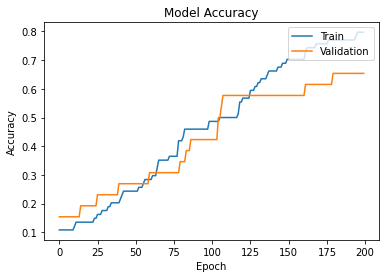

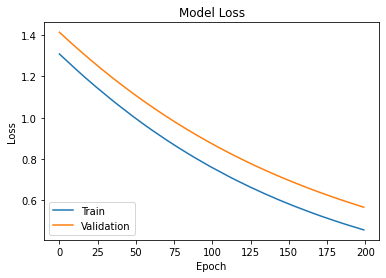

In [45]:
path="Models\\weights.best.4param.hdf5"
#Y_val_no_encoded = np.where(Y_val<0,0,Y_val_no_encoded)
metrics_best(path,X_val,Y_val)
plot(network_history)